In [1]:
# QUESTION - Investigate causes of delayed flights in USA using 2015 data
             # How can performance be improved?

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#import data set for Flights
data=pd.read_csv("C:/Users/Travel Your Style/Documents/IOD Course 22 June 20/DATA/flights.csv", low_memory=False)

In [3]:
#import data set for Airlines 
airlines=pd.read_csv("C:/Users/Travel Your Style/Documents/IOD Course 22 June 20/DATA/datasets_810_1496_airlines.csv")

In [4]:
# check head of data (flights)
data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.tail()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819078,2015,12,31,4,B6,839,N534JB,JFK,BQN,2359,...,442.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# data of flights is for full year of 2015

In [11]:
data.shape

(5819079, 31)

In [ ]:
#Data very large!5.819 million!  Need to reduce columns

In [4]:
#Rename Column  Airline to IATA_CODE
data.rename(columns={'AIRLINE':'IATA_CODE'}, inplace=True)

In [8]:
data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,IATA_CODE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Check head of Airlines data frame
airlines.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [ ]:
#airlines is list matching Ailine two letter IATA Codes with their name

In [33]:
#Rename Airline to Airline_Name as will be duplicate when join tables

airlines.rename(columns={'AIRLINE': 'AIRLINE_NAME'}, inplace=True)

In [6]:
airlines.head()

,IATA_CODE,AIRLINE_NAME
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [12]:
#check shape airlines
airlines.shape

(14, 2)

In [34]:
# Merge data for flights with airlines over common column IATA_CODE
data1=pd.merge(left=data, right=airlines, how='left', left_on='IATA_CODE', right_on='IATA_CODE')

In [7]:
#New Column Airline_Name is attached at end
data1.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,IATA_CODE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE_NAME
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,US Airways Inc.
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.


In [35]:
#Combine Reasons for Delay into one new column for 'Delayed'
delayed_sum=(data1['AIR_SYSTEM_DELAY']+data1['SECURITY_DELAY']+data1['ARRIVAL_DELAY'] +data1['AIRLINE_DELAY']+ data1['LATE_AIRCRAFT_DELAY']+ data1['WEATHER_DELAY']+data1["DEPARTURE_DELAY"])
data1['DELAYED']=delayed_sum

In [25]:
data1.dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
IATA_CODE               object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE                 int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED                 int64
CANCELLED                int64
CANCELLATION_REASON     object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
AIRLINE_NAME            object
DELAYED 

In [9]:
#drop columns needed to reduce data in data frame. Also drop "Cancellation Reason" as too many missing data (50%) and " Cancelled"
#has none missing. Also drop "Departure time" and "Destination Airport" as not really needed
data1.drop(['CANCELLATION_REASON', 'DEPARTURE_TIME', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'YEAR', 'DAY','FLIGHT_NUMBER', 'TAIL_NUMBER', 'ELAPSED_TIME', 'WHEELS_ON', 'TAXI_IN', 'TAXI_OUT', 'WHEELS_OFF', 'DISTANCE', 'AIR_TIME', 'SCHEDULED_ARRIVAL','DIVERTED', 'SCHEDULED_TIME', 'SCHEDULED_DEPARTURE'], axis=1 )

,MONTH,DAY_OF_WEEK,IATA_CODE,DEPARTURE_DELAY,ARRIVAL_TIME,ARRIVAL_DELAY,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE_NAME,DELAYED
0,1,4,AS,-11.0,408.0,-22.0,0,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.,NaN
1,1,4,AA,-8.0,741.0,-9.0,0,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.,NaN
2,1,4,US,-2.0,811.0,5.0,0,NaN,NaN,NaN,NaN,NaN,US Airways Inc.,NaN
3,1,4,AA,-5.0,756.0,-9.0,0,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.,NaN
4,1,4,AS,-1.0,259.0,-21.0,0,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,12,4,B6,-4.0,753.0,-26.0,0,NaN,NaN,NaN,NaN,NaN,JetBlue Airways,NaN
5819075,12,4,B6,-4.0,430.0,-16.0,0,NaN,NaN,NaN,NaN,NaN,JetBlue Airways,NaN
5819076,12,4,B6,-9.0,432.0,-8.0,0,NaN,NaN,NaN,NaN,NaN,JetBlue Airways,NaN
5819077,12,4,B6,-6.0,330.0,-10.0,0,NaN,NaN,NaN,NaN,NaN,JetBlue Airways,NaN


In [45]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5819079 entries, 0 to 5819078
Data columns (total 33 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   IATA_CODE            object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [20]:
#Can see a few Nan values - Check how many missing values
data1.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
IATA_CODE                    0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
AIRLINE_NAME                 0
DELAYED 

In [10]:
# Fill missing values with Zero
data1.fillna(0, inplace = True) 


In [11]:
data1.isnull().sum

<bound method DataFrame.sum of           YEAR  MONTH    DAY  DAY_OF_WEEK  IATA_CODE  FLIGHT_NUMBER  \
0        False  False  False        False      False          False   
1        False  False  False        False      False          False   
2        False  False  False        False      False          False   
3        False  False  False        False      False          False   
4        False  False  False        False      False          False   
...        ...    ...    ...          ...        ...            ...   
5819074  False  False  False        False      False          False   
5819075  False  False  False        False      False          False   
5819076  False  False  False        False      False          False   
5819077  False  False  False        False      False          False   
5819078  False  False  False        False      False          False   

         TAIL_NUMBER  ORIGIN_AIRPORT  DESTINATION_AIRPORT  \
0              False           False                Fal

In [25]:
data1.info


<bound method DataFrame.info of          MONTH  DAY  DAY_OF_WEEK IATA_CODE ORIGIN_AIRPORT  \
0            1    1            4        AS            ANC   
1            1    1            4        AA            LAX   
2            1    1            4        US            SFO   
3            1    1            4        AA            LAX   
4            1    1            4        AS            SEA   
...        ...  ...          ...       ...            ...   
5819074     12   31            4        B6            LAX   
5819075     12   31            4        B6            JFK   
5819076     12   31            4        B6            JFK   
5819077     12   31            4        B6            MCO   
5819078     12   31            4        B6            JFK   

         SCHEDULED_DEPARTURE  DEPARTURE_DELAY  TAXI_OUT  WHEELS_OFF  \
0                          5            -11.0      21.0        15.0   
1                         10             -8.0      12.0        14.0   
2                     

Text(0.5, 1.0, 'Cancellations by Month')

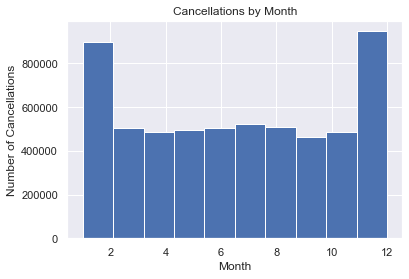

In [28]:
plt.hist(data["MONTH"])
plt.xlabel("Month")
plt.ylabel("Number of Cancellations")
plt.title("Cancellations by Month")

In [ ]:
#Appears more Cancellations in winter months

Text(0.5, 1.0, 'Cancellations by Day of Week')

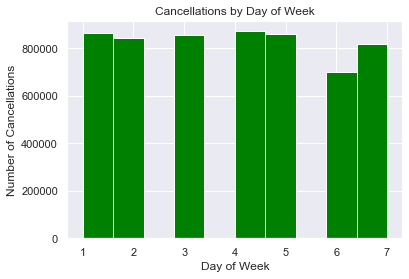

In [29]:
# Look at cancellations by Day or the week

plt.hist(data["DAY_OF_WEEK"], color="green")
plt.xlabel("Day of Week")
plt.ylabel("Number of Cancellations")
plt.title("Cancellations by Day of Week")

In [ ]:
#not a lot of difference in days of week for cancellations, though Saturday seems less likely to have cancellations

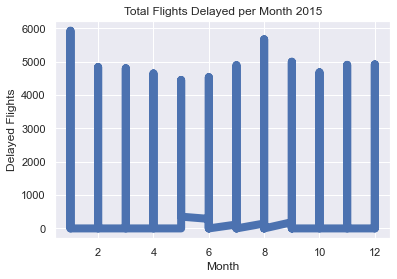

In [12]:
# Plot "Delayed Flights"
plt.plot(data1['MONTH'], data1['DELAYED'], linewidth=8)
plt.xlabel("Month")
plt.ylabel("Delayed Flights")
plt.title("Total Flights Delayed per Month 2015")
plt.show()

In [ ]:
# Most flights seem to be delayed in March, July and December. Possibly correlating 
#to holidays so more flights and passengers travelling at least for December and July...

In [51]:
#look at cancellations by  Airlines
data1.CANCELLED.sum()

89884

Text(0.5, 1.0, 'Cancelled Flights by Airline')

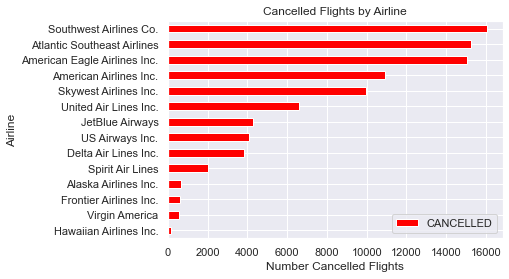

In [17]:
subset_df = data1[['AIRLINE_NAME', 'CANCELLED']]

cancelled_group = subset_df.groupby('AIRLINE_NAME').sum()
cancelled_group = cancelled_group.sort_values('CANCELLED')

cancelled_group.plot.barh(color='red')
plt.xlabel("Number Cancelled Flights")
plt.ylabel("Airline")
plt.title("Cancelled Flights by Airline")


In [ ]:
#Looks Like Southwest Airline has most Cancelled flights - but there is only a small amount of data for cancellations
#is this also the same for Delays?

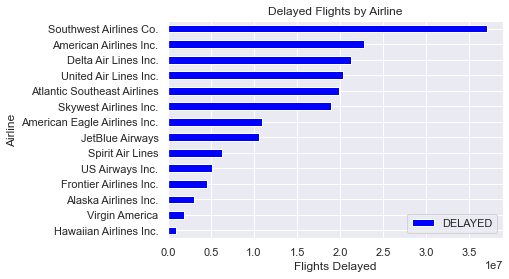

In [30]:
#Is data different for number of "Delayed" flights?
subset_delays = data1[['AIRLINE_NAME', 'DELAYED']]

delayed_group = subset_delays.groupby('AIRLINE_NAME').sum()
delayed_group = delayed_group.sort_values('DELAYED')

delayed_group.plot.barh(color="blue")
plt.xlabel("Flights Delayed")
plt.ylabel("Airline")
plt.title("Delayed Flights by Airline")
plt.show()

In [ ]:
#Looks the similar as Data for cancelled flights and delayed flights.  
#Check out Delays by Reason for airline South West Airlines which  has
#the most delayed and cancelled flights followed by American Airlines.

In [24]:
#Check average minutes delayed 
np.mean(data1["DELAYED"])

31.575011612662415

In [40]:
data1.describe


<bound method NDFrame.describe of          YEAR  MONTH  DAY  DAY_OF_WEEK IATA_CODE  FLIGHT_NUMBER TAIL_NUMBER  \
0        2015      1    1            4        AS             98      N407AS   
1        2015      1    1            4        AA           2336      N3KUAA   
2        2015      1    1            4        US            840      N171US   
3        2015      1    1            4        AA            258      N3HYAA   
4        2015      1    1            4        AS            135      N527AS   
...       ...    ...  ...          ...       ...            ...         ...   
5819074  2015     12   31            4        B6            688      N657JB   
5819075  2015     12   31            4        B6            745      N828JB   
5819076  2015     12   31            4        B6           1503      N913JB   
5819077  2015     12   31            4        B6            333      N527JB   
5819078  2015     12   31            4        B6            839      N534JB   

        ORIGIN_AI

In [39]:
#look at mean delay per airline
data1.groupby("AIRLINE_NAME")[['DELAYED', 'DEPARTURE_DELAY']].mean()

,DELAYED,DEPARTURE_DELAY
AIRLINE_NAME,,
Alaska Airlines Inc.,137.151798,1.785801
American Airlines Inc.,175.040759,8.900856
American Eagle Airlines Inc.,180.635870,10.125188
Atlantic Southeast Airlines,182.033036,8.715934
Delta Air Lines Inc.,179.808834,7.369254
Frontier Airlines Inc.,194.066907,13.350858
Hawaiian Airlines Inc.,109.466117,0.485713
JetBlue Airways,178.118800,11.514353
Skywest Airlines Inc.,176.012644,7.801104


In [ ]:
# Mean departure delay worst for Frontier Airlines 194 minutes per flight!
#

In [21]:
#We have Reasons for Delays- Not enough infor for Cancellations.
#look at Reasons for Delays and counts (in minutes)
reason = (data1[["SECURITY_DELAY", "AIRLINE_DELAY", "WEATHER_DELAY", "LATE_AIRCRAFT_DELAY", "AIR_SYSTEM_DELAY", "DEPARTURE_DELAY", "ARRIVAL_DELAY"]]).sum()
print(reason.head())
#Total for all airlines reasons for Delays- looks like "Late Aircraft" highest cause.
#Is this same for South West Airlines?

SECURITY_DELAY            80985.0
AIRLINE_DELAY          20172956.0
WEATHER_DELAY           3100233.0
LATE_AIRCRAFT_DELAY    24961931.0
AIR_SYSTEM_DELAY       14335762.0
dtype: float64


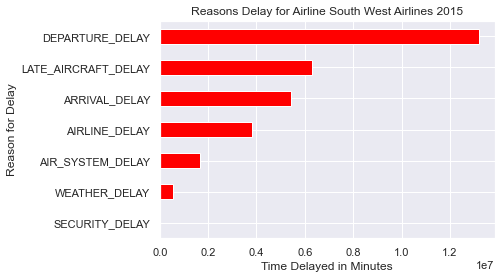

In [32]:
# Plot "REASON DELAY Flights" for South West Airlines (WN) as has highest number 

delayed = data1[data1['IATA_CODE'] == "WN"]
delayed = delayed[["SECURITY_DELAY", "AIRLINE_DELAY", "WEATHER_DELAY", "LATE_AIRCRAFT_DELAY", "AIR_SYSTEM_DELAY", "DEPARTURE_DELAY", "ARRIVAL_DELAY"]]

delayed_sum = delayed.sum()
#plt.plot(x, y, linewidth=8)
delayed_sum.sort_values().plot(kind='barh', color="red")
plt.xlabel("Time Delayed in Minutes")
plt.ylabel("Reason for Delay")
plt.title("Reasons Delay for Airline South West Airlines 2015")
plt.show()

In [56]:
print(delayed_sum)

SECURITY_DELAY            11888.0
AIRLINE_DELAY           3831371.0
WEATHER_DELAY            545369.0
LATE_AIRCRAFT_DELAY     6313558.0
AIR_SYSTEM_DELAY        1669198.0
DEPARTURE_DELAY        13186520.0
dtype: float64


In [ ]:
#The plot shows that "Departure Delay"  is major cause of delays, followed by "Late Aircraft Delay" - which would 
#probably be realted to late Aircraft arriving....
#"Airline & Air System System Delay" and Weather Delay are also factors, but less of an influence for SW Airlines (WN)

In [63]:
(delayed["DEPARTURE_DELAY"]).sum()

13186520.0

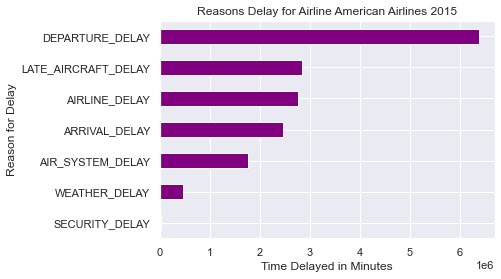

In [33]:
#Look at Reasons for Delay for American Airlines as second highest number
delayed2 = data1[data1['IATA_CODE'] == "AA"]
delayed2 = delayed2[["SECURITY_DELAY", "AIRLINE_DELAY", "WEATHER_DELAY","ARRIVAL_DELAY","LATE_AIRCRAFT_DELAY", "AIR_SYSTEM_DELAY", "DEPARTURE_DELAY"]]

delayed2_sum = delayed2.sum()
#plt.plot(x, y, linewidth=8)
delayed2_sum.sort_values().plot(kind='barh', color="purple")
plt.xlabel("Time Delayed in Minutes")
plt.ylabel("Reason for Delay")
plt.title("Reasons Delay for Airline American Airlines 2015")
plt.show()

In [65]:
#"Departure Delay" has also the highest number of delays recorded for American Airlines
(delayed2["DEPARTURE_DELAY"]).sum()  #Total number minutes delayed for AA in 2015


6369435.0

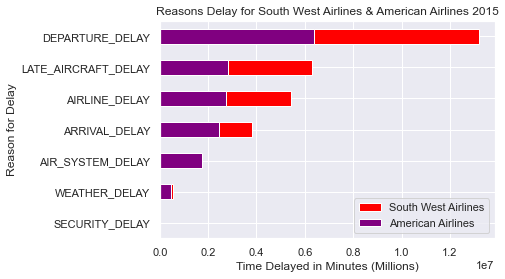

In [36]:
# looks like Departure Delay for South West Airlines is about double that of American Airlines!
# Compare Delay Reasons for SW Airlines against delay reasons for American Airlines

delayed_sum.sort_values().plot(kind='barh', color="red", legend = "show", label="South West Airlines")
delayed2_sum.sort_values().plot(kind='barh', color="purple", legend = "show", label= "American Airlines")
plt.xlabel("Time Delayed in Minutes (Millions)")
plt.ylabel("Reason for Delay")
plt.title("Reasons Delay for South West Airlines & American Airlines 2015")
plt.legend()
plt.show()

In [ ]:
#Both Airlines have same patter in reasons for delay, with Southwest Airline 
#being alomsot double on Departure Delay 

In [41]:
data1.corr()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DELAYED
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,NaN,1.000000,0.008874,-0.007847,-0.020746,0.000207,-0.004085,-0.021994,-0.013117,-0.004946,...,-0.009133,-0.036793,-0.000991,-0.055043,-0.002214,0.007925,0.011262,0.004839,-0.008682,0.012362
DAY,NaN,0.008874,1.000000,0.001111,0.001855,-0.001647,-0.002644,-0.000176,-0.002661,-0.003318,...,-0.004310,-0.003097,0.001981,-0.003537,-0.007375,-0.000510,0.006728,0.008869,0.008882,0.011375
DAY_OF_WEEK,NaN,-0.007847,0.001111,1.000000,0.014461,0.008007,0.005607,-0.011510,-0.020639,0.004060,...,0.005641,-0.017027,-0.001442,-0.022230,-0.023674,0.001576,0.011264,-0.018026,-0.006794,-0.015579
FLIGHT_NUMBER,NaN,-0.020746,0.001855,0.014461,1.000000,-0.005485,-0.001444,-0.008665,0.050369,0.005289,...,-0.002821,0.018419,0.003802,0.037895,-0.009235,-0.007994,0.007168,0.022274,-0.002836,0.011822
SCHEDULED_DEPARTURE,NaN,0.000207,-0.001647,0.008007,-0.005485,1.000000,0.963791,0.110149,0.006581,0.938008,...,0.629342,0.100220,-0.000752,0.011752,-0.075174,-0.005068,-0.089095,0.145054,-0.013470,0.005869
DEPARTURE_TIME,NaN,-0.004085,-0.002644,0.005607,-0.001444,0.963791,1.000000,0.171723,0.014002,0.971971,...,0.648265,0.159787,0.001425,0.008055,-0.043878,-0.004682,-0.024131,0.182374,-0.004221,0.097828
DEPARTURE_DELAY,NaN,-0.021994,-0.000176,-0.011510,-0.008665,0.110149,0.171723,1.000000,0.058515,0.162582,...,0.049236,0.944672,0.022963,0.033099,0.095917,0.011877,0.621296,0.554802,0.243532,0.981933
TAXI_OUT,NaN,-0.013117,-0.002661,-0.020639,0.050369,0.006581,0.014002,0.058515,1.000000,0.039104,...,0.029745,0.227319,0.012251,0.005062,0.361659,-0.005988,-0.070290,-0.127824,0.063308,-0.026240
WHEELS_OFF,NaN,-0.004946,-0.003318,0.004060,0.005289,0.938008,0.971971,0.162582,0.039104,1.000000,...,0.667991,0.155773,0.001667,0.004805,-0.026377,-0.006180,-0.032810,0.156089,-0.008338,0.076456


In [ ]:
# Strong correlation between Arrival Delay and Departure Delay (0.944672)which could contribute to Late Arrival of Aircraft.
#"Late Aircraft Delay" has a strong Correlation with Departure Delay(0.5548). Weather overall has a strong correlation with delay (0.98193), but not showing as a high factor with the top two airlines

In [ ]:
#Choose variable for Linear regression
#Biggest correlation is between "Departure Delay" and "Arrival Delay" (0.958), though this is pretty much a given that would happen as
# if flight departs late it will most likely arrive late, (and have a knock on effect to the next flight.)
#More Interesting to look at if flight "Departure delayed" by minutes, how it impacts on delay due to "Late Aircraft Arrival."
#Correlation still strong at (0.554)
#IE. causing next flight to be late in departing
#Look at relationship if "Departure delayed" is strong likelihood of next flight being delayed by "Late Aircraft Arrival" 

In [81]:
import seaborn as seabornInstance 
from scipy import *
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

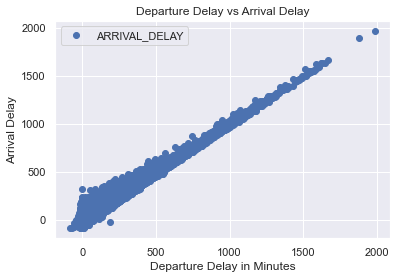

In [60]:
#look at dataset to see if any relationships with data between DEPARTURE DELAY
#& ARRIVAL DELAY (correlation 0.944)
data1.plot(x='DEPARTURE_DELAY', y='ARRIVAL_DELAY', style='o')  
plt.title('Departure Delay vs Arrival Delay')  
plt.xlabel('Departure Delay in Minutes')  
plt.ylabel('Arrival Delay')  
plt.show()

In [ ]:
#Data for DEPARTURE DELAY and ARRIVAL DELAY looks closely correlated - should
#be good for linear regression, but will also check some of other options.

In [131]:
#data set too big for regression model. Take sample size 10,000

import random
departure = data1['DEPARTURE_DELAY'].sample(n=100000, random_state=1, )
arrival = data1['ARRIVAL_DELAY'].sample(n=100000, random_state=1)

In [72]:
departure.dtypes

dtype('float64')

In [73]:
arrival.dtypes

dtype('float64')

In [132]:
departure.isnull().sum

<bound method Series.sum of 4605645    False
398028     False
2978311    False
2602363    False
2478083    False
           ...  
5426098    False
728042      True
2674939    False
23975      False
2971571    False
Name: DEPARTURE_DELAY, Length: 100000, dtype: bool>

In [133]:
#Fill missing data with 0
departure.fillna(0, inplace=True)


In [134]:
departure.isnull().sum==True

False

In [135]:
arrival.isnull().sum()


1829

In [136]:
arrival.fillna(0, inplace=True)

In [137]:
arrival.isnull().sum()

0

In [138]:
#derive attributes and  labels
X = departure.values.reshape(-1,1)
y = arrival.values.reshape(-1,1)


In [139]:
#split data to 70% training and 30% test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [140]:
# have already imported Linear Regression
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

In [141]:
#To retrieve the intercept:
print(regressor.intercept_)

[-4.75775077]


In [142]:
#For retrieving the slope:
print(regressor.coef_)

[[0.98726466]]


In [143]:
#look at predictor
y_pred = regressor.predict(X_test)

In [144]:
#compare actual values of X_test to predicted
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,-4.0,-4.757751
1,-4.0,1.165837
2,-6.0,-4.757751
3,71.0,78.172481
4,3.0,12.025749
...,...,...
29995,1.0,-7.719545
29996,7.0,-8.706809
29997,-10.0,-11.668603
29998,-12.0,-0.808692


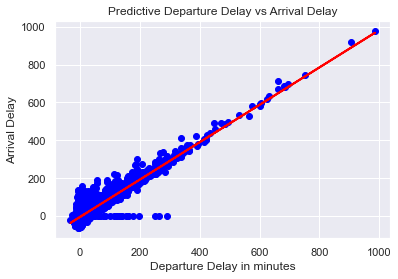

In [145]:
#plot the preditive straight line with the data Departure Delay and Arrival Delay 
plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel("Departure Delay in minutes")
plt.ylabel("Arrival Delay")
plt.title ("Predictive Departure Delay vs Arrival Delay")
plt.show()

In [146]:
#The straight line in the above graph shows our algorithm is correct. Though actual
# is rising higher than predicted
#The final step is to evaluate the performance of the algorithm
#determine Mean Absolute Error (MAE), Mean Squared Error (MSR), Root Mean Squared Error (RMSE)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 9.117666841151514
Mean Squared Error: 182.43829412311467
Root Mean Squared Error: 13.506972056057371


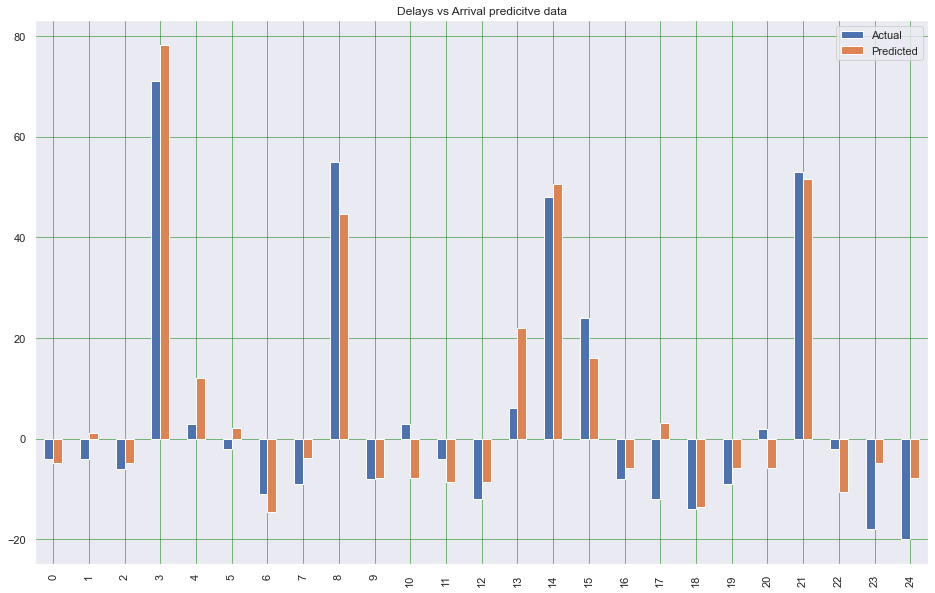

In [100]:
#data size is huge so just look at first 25 to plot Predicted vs Actual of 
#Departure Delay vs Arrival Delay
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Delays vs Arrival predicitve data")
plt.show()

Mean Absolute Error: 9.117666841151514
Mean Squared Error: 182.43829412311467
Root Mean Squared Error: 13.506972056057371


In [ ]:
##############################################################################

In [ ]:
# Repeat process to look at lATE AIRCRAFT ARRIVAL vs Depature Delay 

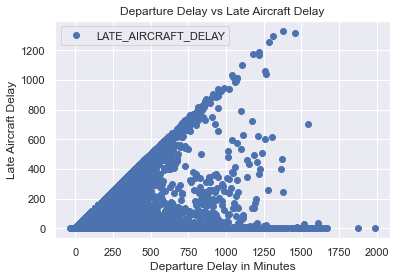

In [43]:
#look at dataset to see if any relationships with data  DEPARTURE DELAY & 
#LATE AIRCRAFT DELAY (correlation  0.5548)
data1.plot(x='DEPARTURE_DELAY', y='LATE_AIRCRAFT_DELAY', style='o')  
plt.title('Departure Delay vs Late Aircraft Delay')  
plt.xlabel('Departure Delay in Minutes')  
plt.ylabel('Late Aircraft Delay')  
plt.show()

In [108]:
import random
departure = data1['DEPARTURE_DELAY'].sample(n=100000, random_state=1, )
late = data1['LATE_AIRCRAFT_DELAY'].sample(n=100000, random_state=1)

In [109]:
late.isnull().sum()

81782

In [110]:
late.fillna(0, inplace=True)

In [111]:
late.isnull().sum()

0

In [117]:
#derive attributes and  labels
X = departure.values.reshape(-1,1)
y = late.values.reshape(-1,1)


In [118]:
#split data to 70% training and 30% test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [119]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

In [120]:
#To retrieve the intercept:
print(regressor.intercept_)

[0.91918348]


In [121]:
#For retrieving the slope:
print(regressor.coef_)

[[0.36135073]]


In [122]:
#look at predictor
y_pred = regressor.predict(X_test)

In [125]:
#compare actual values of X_test to predicted
df2 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df2

,Actual,Predicted
0,0.0,0.919183
1,0.0,3.087288
2,0.0,0.919183
3,0.0,31.272644
4,0.0,7.062146
...,...,...
29995,0.0,-0.164869
29996,0.0,-0.526219
29997,0.0,-1.610272
29998,0.0,2.364586


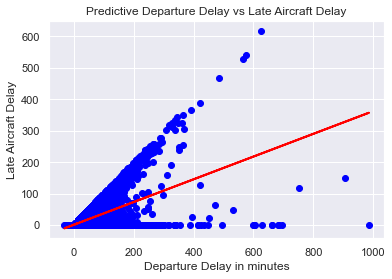

In [126]:
#plot the preditive straight line with the data Departure Delay and Late Aircraft Delay 
plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel("Departure Delay in minutes")
plt.ylabel("Late Aircraft Delay")
plt.title ("Predictive Departure Delay vs Late Aircraft Delay")
plt.show()

In [129]:
#The straight line in the above graph shows our algorithm is correct. Though actual
# is rising higher than predicted
#The final step is to evaluate the performance of the algorithm
#determine Mean Absolute Error (MAE), Mean Squared Error (MSR), Root Mean Squared Error (RMSE)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.4028157474603935
Mean Squared Error: 253.96223944878002
Root Mean Squared Error: 15.936192752623821


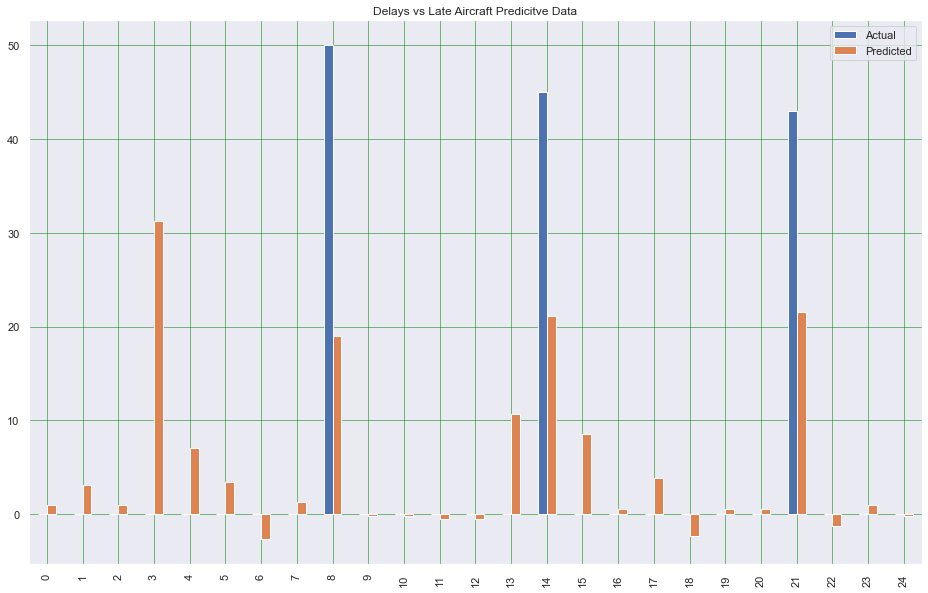

In [127]:
#data size is huge so just look at first 25 to plot Predicted vs Actual of 
#Departure Delay vs Arrival Delay
df2 = df.head(25)
df2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Delays vs Late Aircraft Predicitve Data")
plt.show()

In [ ]:
################################################################################################################################